<a href="https://colab.research.google.com/github/shu7620/EDA/blob/main/Extro_VS_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predict the Introverts from the Extroverts**

**Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

**import the csv files**

In [2]:
# import csv
train_df = pd.read_csv("/content/drive/MyDrive/train (2).csv")
test_df = pd.read_csv("/content/drive/MyDrive/test (1).csv")

In [3]:
train_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


# **Exploratory Data Analysis (EDA)**

In [4]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [18]:
numeric_df = train_df.select_dtypes(include='number').drop(columns=['id'])
numeric_df.corr()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000000,-0.628806,-0.640884,-0.598014,-0.611544
Social_event_attendance,-0.628806,1.000000,0.585224,0.566675,0.566679
Going_outside,-0.640884,0.585224,1.000000,0.549864,0.579305
Friends_circle_size,-0.598014,0.566675,0.549864,1.000000,0.522272
Post_frequency,-0.611544,0.566679,0.579305,0.522272,1.000000


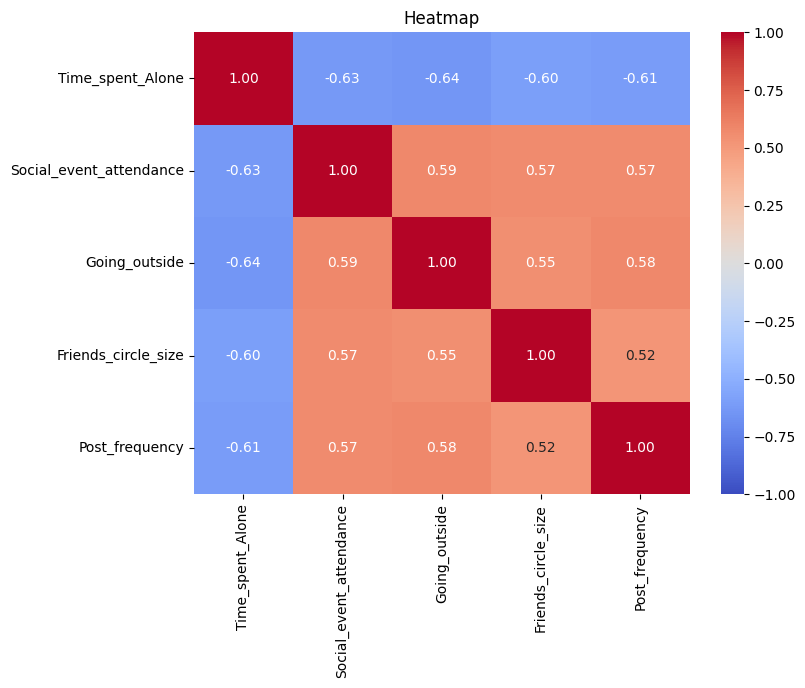

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',fmt='.2f', vmin=-1, vmax=1)
plt.title('Heatmap')
plt.show()

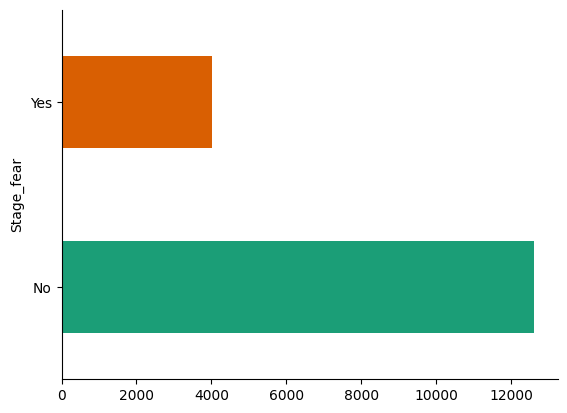

In [6]:
# @title Stage_fear

train_df.groupby('Stage_fear').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

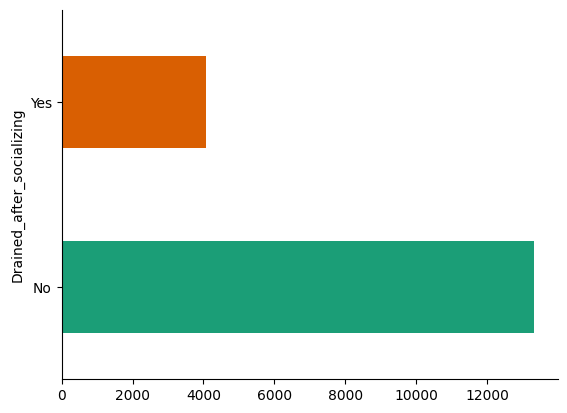

In [7]:
# @title Drained_after_Socializing

train_df.groupby('Drained_after_socializing').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

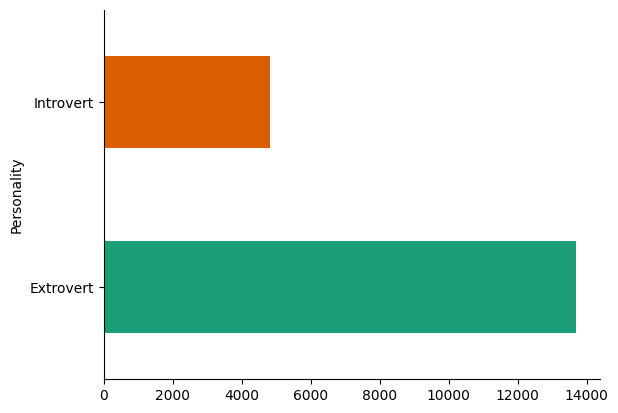

In [8]:
# @title Personality

train_df.groupby('Personality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

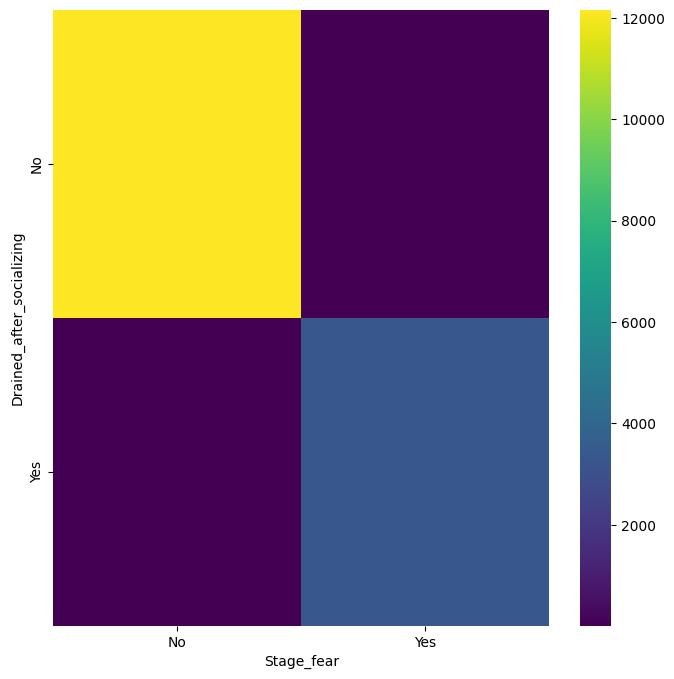

In [12]:
# @title Stage_fear vs Drained_after_socializing
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Drained_after_socializing'].value_counts()
    for x_label, grp in train_df.groupby('Stage_fear')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Stage_fear')
_ = plt.ylabel('Drained_after_socializing')

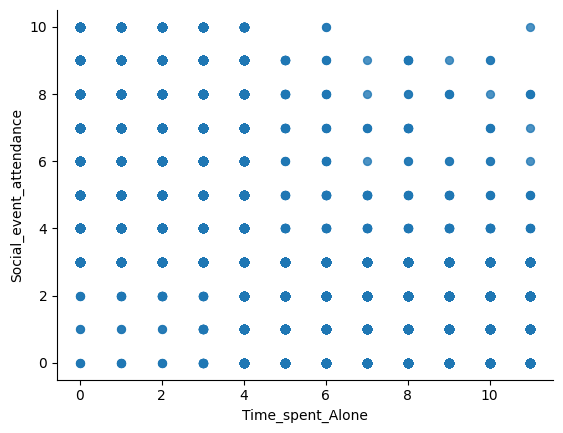

In [14]:
# @title Time_spent_Alone vs Social_event_attendance

from matplotlib import pyplot as plt
train_df.plot(kind='scatter', x='Time_spent_Alone', y='Social_event_attendance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

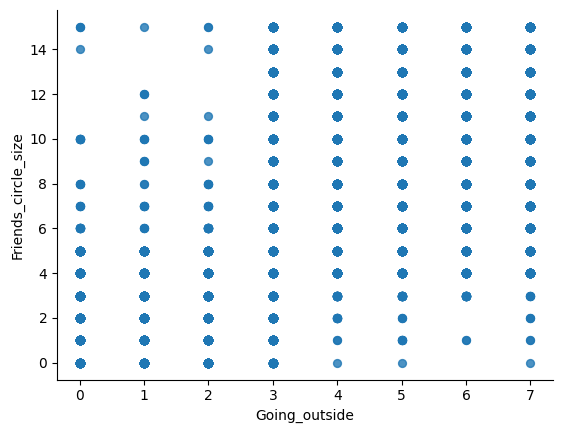

In [15]:
# @title Going_outside vs Friends_circle_size

from matplotlib import pyplot as plt
train_df.plot(kind='scatter', x='Going_outside', y='Friends_circle_size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Missing Value Imputation**




In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [21]:
train_ID = train_df['id']
test_ID = test_df['id']

train_df.drop("id", axis = 1, inplace = True)
test_df.drop("id", axis = 1, inplace = True)

ntrain = train_df.shape[0]
ntest = test_df.shape[0]
y_train = train_df['Personality'].map({'Extrovert': 1, 'Introvert': 0}).values

all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data.drop(['Personality'], axis=1, inplace=True)

In [22]:
# 1. Create a new grouping column based on the quartiles of Social_event_attendance
all_data['social_attend_bin'] = pd.qcut(
    all_data['Social_event_attendance'],
    q=[0, 0.25, 0.5, 0.75, 1.0],
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)


# 2. Define a function to fill missing values in Time\_spent\_Alone with the median within each group
def fill_by_group_median(df, group_col, target_col):
    return df[target_col].fillna(df.groupby(group_col)[target_col].transform('median'))

# 3.Perform group-wise filling of missing values
all_data['Time_spent_Alone'] = fill_by_group_median(
    all_data, group_col='social_attend_bin', target_col='Time_spent_Alone'
)


all_data.drop(columns=['social_attend_bin'], inplace=True)

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24699 entries, 0 to 24698
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           24648 non-null  float64
 1   Stage_fear                 22208 non-null  object 
 2   Social_event_attendance    23122 non-null  float64
 3   Going_outside              22767 non-null  float64
 4   Drained_after_socializing  23118 non-null  object 
 5   Friends_circle_size        23295 non-null  float64
 6   Post_frequency             23027 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.3+ MB


In [23]:
all_data['Going_outside_bin'] = pd.qcut(
    all_data['Going_outside'],
    q=[0, 0.25, 0.5, 0.75, 1.0],
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)

def fill_by_group_median(df, group_col, target_col):
    return df[target_col].fillna(df.groupby(group_col)[target_col].transform('median'))

# 3. Perform group-wise filling of missing values
all_data['Time_spent_Alone'] = fill_by_group_median(
    all_data, group_col='Going_outside_bin', target_col='Time_spent_Alone'
)


all_data.drop(columns=['Going_outside_bin'], inplace=True)

In [24]:
# 1. Create a new grouping column based on the quartiles of Social_event_attendance
all_data['Going_outside_bin'] = pd.qcut(
    all_data['Going_outside'],
    q=[0, 0.25, 0.5, 0.75, 1.0],
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)


# 2. Define a function to fill missing values in Time\_spent\_Alone with the median within each group
def fill_by_group_median(df, group_col, target_col):
    return df[target_col].fillna(df.groupby(group_col)[target_col].transform('median'))

# 3. Perform group-wise filling of missing values
all_data['Social_event_attendance'] = fill_by_group_median(
    all_data, group_col='Going_outside_bin', target_col='Social_event_attendance'
)


all_data.drop(columns=['Going_outside_bin'], inplace=True)

In [25]:
# 1. Create a new grouping column based on the quartiles of Social_event_attendance
all_data['Friends_circle_bin'] = pd.qcut(
    all_data['Friends_circle_size'],
    q=[0, 0.25, 0.5, 0.75, 1.0],
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)


# 2. Define a function to fill missing values in Time\_spent\_Alone with the median within each group
def fill_by_group_median(df, group_col, target_col):
    return df[target_col].fillna(df.groupby(group_col)[target_col].transform('median'))

# 3. Perform group-wise filling of missing values
all_data['Social_event_attendance'] = fill_by_group_median(
    all_data, group_col='Friends_circle_bin', target_col='Social_event_attendance'
)


all_data.drop(columns=['Friends_circle_bin'], inplace=True)

In [26]:
# 1. Create a new grouping column based on the quartiles of Social_event_attendance
all_data['Post_frequency_bin'] = pd.qcut(
    all_data['Post_frequency'],
    q=[0, 0.25, 0.5, 0.75, 1.0],
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)


# 2. Define a function to fill missing values in Time\_spent\_Alone with the median within each group

def fill_by_group_median(df, group_col, target_col):
    return df[target_col].fillna(df.groupby(group_col)[target_col].transform('median'))

# 3. Perform group-wise filling of missing values
all_data['Social_event_attendance'] = fill_by_group_median(
    all_data, group_col='Post_frequency_bin', target_col='Social_event_attendance'
)

all_data.drop(columns=['Post_frequency_bin'], inplace=True)

In [27]:
def fill_missing_by_quantile_group(df, group_source_col, target_col, quantiles=[0, 0.25, 0.5, 0.75, 1.0], labels=None):
    """
        Fill missing values in `target_col` by grouping based on the quantiles of `group_source_col`, and using the median of each group to impute missing values.

        **Parameters:**
        - `df` (`pd.DataFrame`): The original dataset
        - `group_source_col` (`str`): The numeric column used for grouping
        - `target_col` (`str`): The target column with missing values to be filled
        - `quantiles` (`list`): Quantile breakpoints for grouping (default is quartiles)
        - `labels` (`list`): Labels for each group (default is auto-generated as Q1/Q2/...)

        **Returns:**
        - `pd.DataFrame`: The DataFrame with missing values filled (modifies in place)

    """
    # Automatically Generate Group Labels
    if labels is None:
        labels = [f'Q{i+1}' for i in range(len(quantiles)-1)]

    temp_bin_col = f'{group_source_col}_bin'

    # Step 1: Create Grouping Column
    df[temp_bin_col] = pd.qcut(df[group_source_col], q=quantiles, labels=labels)

    # Step 2: Fill Missing Values Within Groups Using the Median
    df[target_col] = df[target_col].fillna(df.groupby(temp_bin_col)[target_col].transform('median'))

    # Step 3: Delete Temporary Columns
    df.drop(columns=[temp_bin_col], inplace=True)

    return df

all_data = fill_missing_by_quantile_group(
    df=all_data,
    group_source_col='Social_event_attendance',
    target_col='Going_outside'
)

all_data = fill_missing_by_quantile_group(
    df=all_data,
    group_source_col='Post_frequency',
    target_col='Friends_circle_size'
)
all_data = fill_missing_by_quantile_group(
    df=all_data,
    group_source_col='Going_outside',
    target_col='Friends_circle_size'
)
all_data = fill_missing_by_quantile_group(
    df=all_data,
    group_source_col='Friends_circle_size',
    target_col='Post_frequency'
)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24699 entries, 0 to 24698
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           24699 non-null  float64
 1   Stage_fear                 22208 non-null  object 
 2   Social_event_attendance    24699 non-null  float64
 3   Going_outside              24699 non-null  float64
 4   Drained_after_socializing  23118 non-null  object 
 5   Friends_circle_size        24699 non-null  float64
 6   Post_frequency             24699 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.3+ MB


In [28]:
all_data.fillna({
    'Stage_fear': 'UnKnow',
    'Drained_after_socializing': 'UnKnow'
}, inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24699 entries, 0 to 24698
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           24699 non-null  float64
 1   Stage_fear                 24699 non-null  object 
 2   Social_event_attendance    24699 non-null  float64
 3   Going_outside              24699 non-null  float64
 4   Drained_after_socializing  24699 non-null  object 
 5   Friends_circle_size        24699 non-null  float64
 6   Post_frequency             24699 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.3+ MB


**Box Plot of all numeric datatypes**

<Axes: title={'center': 'Boxplot'}>

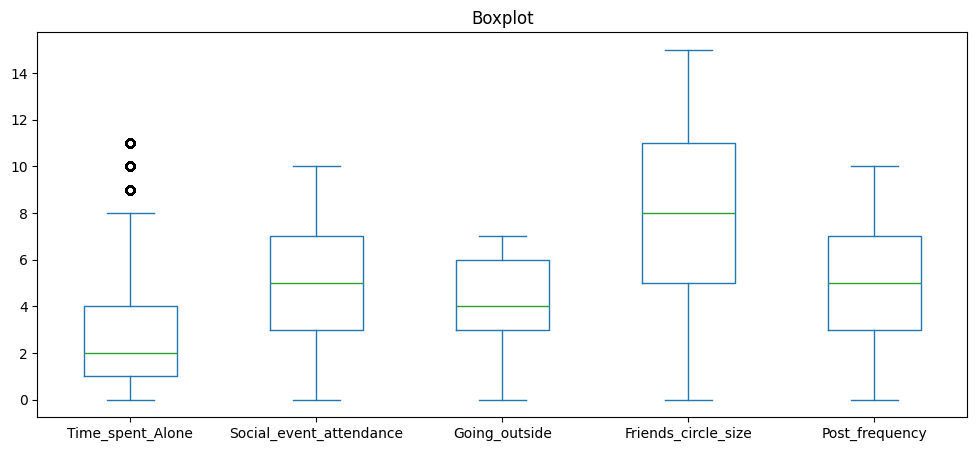

In [29]:
# @title Box Plot of all numeric datatypes
numeric_all_data = all_data.select_dtypes(include='number')
numeric_all_data.plot(kind='box', title='Boxplot', figsize=(12, 5))

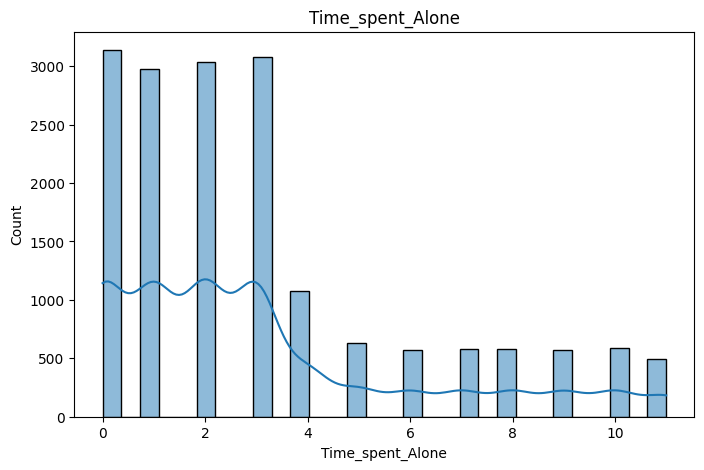

In [30]:
# @title Time Spent Alone: Histogram Analysis
plt.figure(figsize=(8, 5))
sns.histplot(train_df['Time_spent_Alone'], bins=30, kde=True)
plt.title("Time_spent_Alone")
plt.xlabel("Time_spent_Alone")
plt.show()

In [31]:
all_data = pd.get_dummies(all_data, columns=['Stage_fear', 'Drained_after_socializing'], prefix=['Stage', 'Drained'])
all_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24699 entries, 0 to 24698
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time_spent_Alone         24699 non-null  float64
 1   Social_event_attendance  24699 non-null  float64
 2   Going_outside            24699 non-null  float64
 3   Friends_circle_size      24699 non-null  float64
 4   Post_frequency           24699 non-null  float64
 5   Stage_No                 24699 non-null  bool   
 6   Stage_UnKnow             24699 non-null  bool   
 7   Stage_Yes                24699 non-null  bool   
 8   Drained_No               24699 non-null  bool   
 9   Drained_UnKnow           24699 non-null  bool   
 10  Drained_Yes              24699 non-null  bool   
dtypes: bool(6), float64(5)
memory usage: 1.1 MB


In [32]:
all_data.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_No,Stage_UnKnow,Stage_Yes,Drained_No,Drained_UnKnow,Drained_Yes
0,0.0,6.0,4.0,15.0,5.0,True,False,False,True,False,False
1,1.0,7.0,3.0,10.0,8.0,True,False,False,True,False,False
2,6.0,1.0,0.0,3.0,0.0,False,False,True,False,True,False
3,3.0,7.0,3.0,11.0,5.0,True,False,False,True,False,False
4,1.0,4.0,4.0,13.0,6.0,True,False,False,True,False,False


# **Model Training**

In [33]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


In [34]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')

In [35]:
X_train = all_data[:ntrain]
X_test = all_data[ntrain:]
X=X_train
y=y_train

In [36]:
class_0 = y_train.sum()
class_1 = len(y_train) - class_0
scale_pos_weight = class_1 / class_0

In [37]:
#@title Classifier Configuration: XGBoost, CatBoost, and LightGBM
xgb = XGBClassifier(
    max_depth=4,
    learning_rate=0.01,
    n_estimators=1000,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

cat = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.1,
    class_weights=[scale_pos_weight, 1],
    random_seed=42,
    verbose=0
)

lgbm = LGBMClassifier(
    num_leaves=31,
    learning_rate=0.1,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight={0: scale_pos_weight, 1: 1},
    random_state=42
)

In [38]:
#@title Create ensemble
ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb),
        ('cat', cat),
        ('lgbm', lgbm)
    ],
    voting='soft'
)

In [39]:
#@title Train with validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
ensemble.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 10959, number of negative: 3860
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.889634 -> initscore=2.087006
[LightGBM] [Info] Start training from score 2.087006


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rat...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1000, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7a4fc77fe110>),
                             ('lgbm',
                              LGBMClassifier(class_weight={0: np.float64(0.35221549018176507),
                                                           1: 1},
                                             colsample_bytree=0.8,
                                             n_estimators=300, random_state=42,
                                             subsample=0.8))],
                 voting='soft')

In [40]:
#@title Optimize threshold
val_probs = ensemble.predict_proba(X_val)[:, 1]
best_threshold = 0.5
best_acc = 0

for threshold in np.arange(0.4, 0.6, 0.01):
    preds = (val_probs >= threshold).astype(int)

In [41]:
#@title Create submission
test_probs = ensemble.predict_proba(X_test)[:, 1]
test_preds = (test_probs >= best_threshold).astype(int)


submission = pd.DataFrame({
    'id': test_ID,
    'Personality': test_preds
})
print(submission.head())
submission['Personality'] = submission['Personality'].map({1: 'Extrovert', 0: 'Introvert'})
submission.to_csv('submission.csv', index=False)
print("Submitted successfully with XGBoost")

      id  Personality
0  18524            1
1  18525            0
2  18526            1
3  18527            1
4  18528            0
Submitted successfully with XGBoost


# **Accuracy Report**

In [42]:
#@title Accuracy score
from sklearn.metrics import accuracy_score

# After making predictions
preds = (val_probs >= best_threshold).astype(int)
acc = accuracy_score(y_val, preds)
print(f"Accuracy: {acc:.4f}")


Accuracy: 0.9652


In [43]:
#@title Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_val, preds, target_names=['Extrovert', 'Introvert']))

              precision    recall  f1-score   support

   Extrovert       0.94      0.92      0.93       965
   Introvert       0.97      0.98      0.98      2740

    accuracy                           0.97      3705
   macro avg       0.96      0.95      0.95      3705
weighted avg       0.97      0.97      0.97      3705



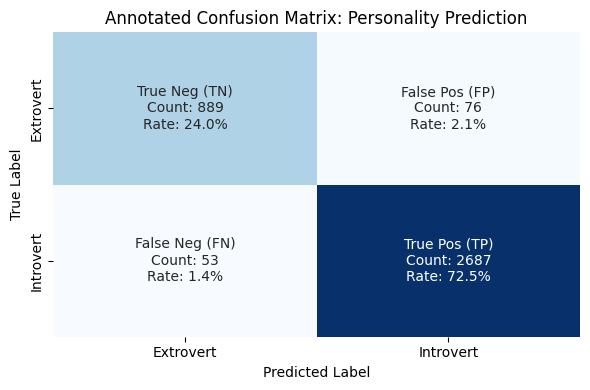

In [46]:
#@title Confusion Matrix
# Define class labels
labels = ['Extrovert', 'Introvert']
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Descriptive text annotations
group_names = ['True Neg (TN)', 'False Pos (FP)', 'False Neg (FN)', 'True Pos (TP)']
counts = [f"{value}" for value in cm.flatten()]
percentages = [f"{(value / cm.sum() * 100):.1f}%" for value in cm.flatten()]
box_labels = [f"{name}\nCount: {count}\nRate: {percent}"
              for name, count, percent in zip(group_names, counts, percentages)]
box_labels = np.array(box_labels).reshape(2, 2)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=box_labels, fmt='', cmap='Blues', cbar=False)
plt.title("Annotated Confusion Matrix: Personality Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
